In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, ConfusionMatrixDisplay, roc_auc_score,RocCurveDisplay,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("application_record.csv", encoding = 'utf-8')
record = pd.read_csv("credit_record.csv", encoding = 'utf-8')
df = pd.merge(data,record,how="inner",on="ID")
print(df.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [5]:
#drop na
df = df.dropna()
df = df.drop(['FLAG_MOBIL','FLAG_WORK_PHONE','MONTHS_BALANCE','FLAG_PHONE','FLAG_EMAIL','ID'],axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537667 entries, 31 to 777714
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          537667 non-null  object 
 1   FLAG_OWN_CAR         537667 non-null  object 
 2   FLAG_OWN_REALTY      537667 non-null  object 
 3   CNT_CHILDREN         537667 non-null  int64  
 4   AMT_INCOME_TOTAL     537667 non-null  float64
 5   NAME_INCOME_TYPE     537667 non-null  object 
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  OCCUPATION_TYPE      537667 non-null  object 
 12  CNT_FAM_MEMBERS      537667 non-null  float64
 13  STATUS               537667 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 61.5+ MB


In [6]:
#Replace STATUS target default
replace_dict = {'0':0,'1':0,'2':1,'3':1,'4':1,'5':1,'C':0,'X':0}
#1- bad,0-good, 3-5% default rate according to basel min
df['STATUS'] = df['STATUS'].replace(replace_dict)
print(df['STATUS'].value_counts())

0    535705
1      1962
Name: STATUS, dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537667 entries, 31 to 777714
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          537667 non-null  object 
 1   FLAG_OWN_CAR         537667 non-null  object 
 2   FLAG_OWN_REALTY      537667 non-null  object 
 3   CNT_CHILDREN         537667 non-null  int64  
 4   AMT_INCOME_TOTAL     537667 non-null  float64
 5   NAME_INCOME_TYPE     537667 non-null  object 
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  OCCUPATION_TYPE      537667 non-null  object 
 12  CNT_FAM_MEMBERS      537667 non-null  float64
 13  STATUS               537667 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 61.5+ MB


In [8]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
count,537667.000000,5.376670e+05,537667.000000,537667.000000,537667.000000,537667.000000
mean,0.506697,1.971171e+05,-15010.958999,-2762.029935,2.303069,0.003649
std,0.787285,1.041390e+05,3416.418092,2393.919456,0.936852,0.060298
min,0.000000,2.700000e+04,-24611.000000,-15713.000000,1.000000,0.000000
25%,0.000000,1.350000e+05,-17594.000000,-3661.000000,2.000000,0.000000
50%,0.000000,1.800000e+05,-14785.000000,-2147.000000,2.000000,0.000000
75%,1.000000,2.295000e+05,-12239.000000,-1050.000000,3.000000,0.000000
max,19.000000,1.575000e+06,-7489.000000,-17.000000,20.000000,1.000000


In [9]:
def drop_outliers(df, column_name, multiplier=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + multiplier * IQR
    
    filtered_df = df[df[column_name] <= upper_threshold]
    
    return filtered_df

In [10]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    lst = []
    

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv)
    print(df[feature].value_counts())
    return iv, data

In [11]:
#Create a ivtable
ivtable=pd.DataFrame(df.columns,columns=['variable'])
ivtable['iv'] = None
ivtable = ivtable.drop(13)
print(ivtable)

               variable    iv
0           CODE_GENDER  None
1          FLAG_OWN_CAR  None
2       FLAG_OWN_REALTY  None
3          CNT_CHILDREN  None
4      AMT_INCOME_TOTAL  None
5      NAME_INCOME_TYPE  None
6   NAME_EDUCATION_TYPE  None
7    NAME_FAMILY_STATUS  None
8     NAME_HOUSING_TYPE  None
9            DAYS_BIRTH  None
10        DAYS_EMPLOYED  None
11      OCCUPATION_TYPE  None
12      CNT_FAM_MEMBERS  None


In [12]:
#Create a woe
woe_table=pd.DataFrame(df.columns,columns=['variable'])
woe_table['woe'] = None
woe_table = woe_table.drop(13)
print(woe_table)

               variable   woe
0           CODE_GENDER  None
1          FLAG_OWN_CAR  None
2       FLAG_OWN_REALTY  None
3          CNT_CHILDREN  None
4      AMT_INCOME_TOTAL  None
5      NAME_INCOME_TYPE  None
6   NAME_EDUCATION_TYPE  None
7    NAME_FAMILY_STATUS  None
8     NAME_HOUSING_TYPE  None
9            DAYS_BIRTH  None
10        DAYS_EMPLOYED  None
11      OCCUPATION_TYPE  None
12      CNT_FAM_MEMBERS  None


# Continous data

Number of CNT_CHILDREN unique_value: 9
0     343151
1     127695
2      58791
3       6549
4       1070
5        248
14       111
7         46
19         6
Name: CNT_CHILDREN, dtype: int64


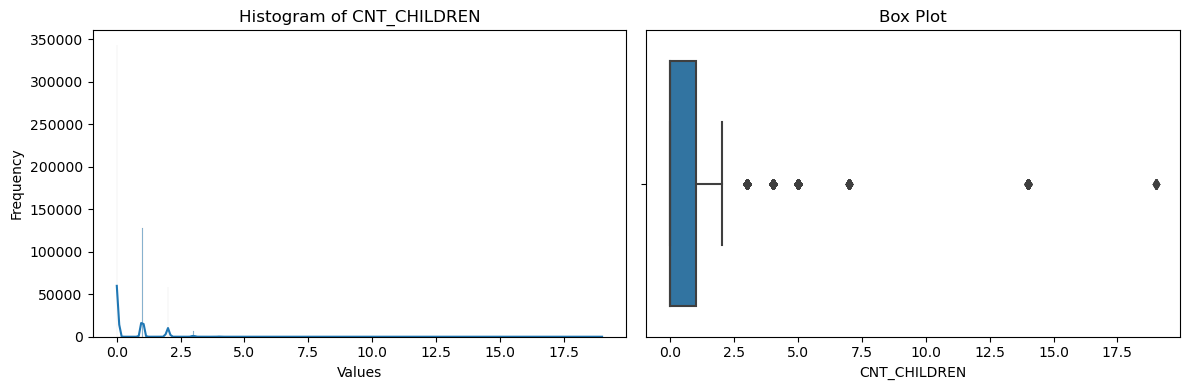

In [13]:
#CNT_CHILDREN col
print('Number of CNT_CHILDREN unique_value:',df['CNT_CHILDREN'].nunique())
print(df['CNT_CHILDREN'].value_counts())
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 


sns.histplot(df['CNT_CHILDREN'], kde=True, ax=axes[0])
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of CNT_CHILDREN')


sns.boxplot(data=df, x='CNT_CHILDREN', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Box Plot')

plt.tight_layout()
plt.savefig("child.png")

plt.show()

In [14]:
df = drop_outliers(df,'CNT_CHILDREN',multiplier = 1.5)
print(df['CNT_CHILDREN'].value_counts())

0    343151
1    127695
2     58791
Name: CNT_CHILDREN, dtype: int64


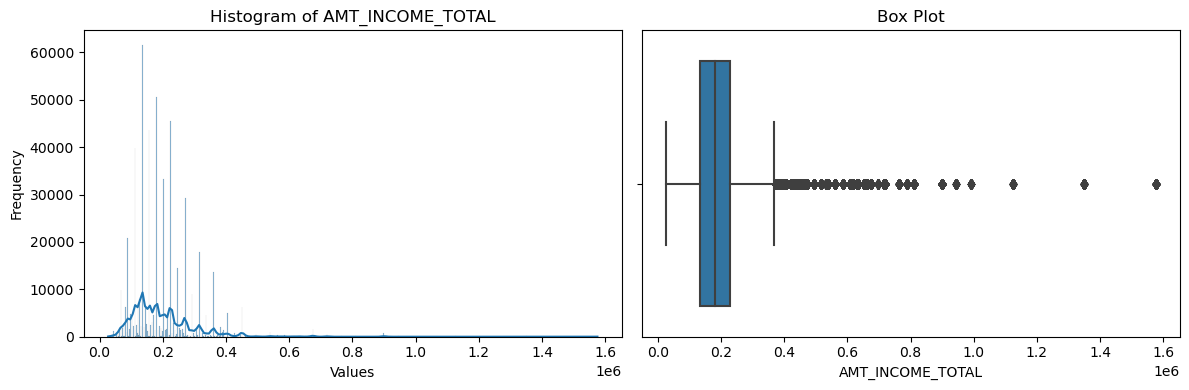

In [15]:
#AMT_INCOME_TOTAL col
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 


sns.histplot(df['AMT_INCOME_TOTAL'], kde=True, ax=axes[0])
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of AMT_INCOME_TOTAL')


sns.boxplot(data=df, x='AMT_INCOME_TOTAL', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Box Plot')

plt.tight_layout()
plt.savefig("incom_pre.png")

plt.show()

#Remove outlier
df = drop_outliers(df,'AMT_INCOME_TOTAL',3.5)

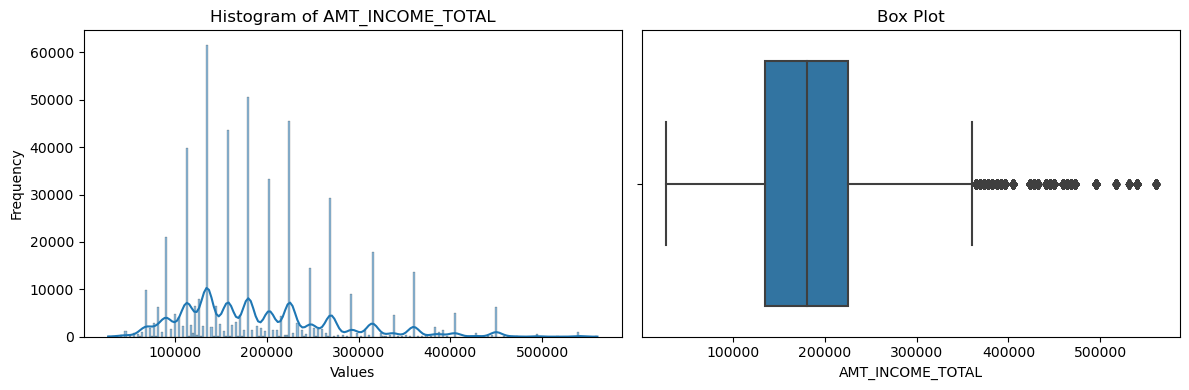

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 


sns.histplot(df['AMT_INCOME_TOTAL'], kde=True, ax=axes[0])
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of AMT_INCOME_TOTAL')


sns.boxplot(data=df, x='AMT_INCOME_TOTAL', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Box Plot')

plt.tight_layout()


plt.show()


In [17]:
df['AMT_INCOME_TOTAL'] = pd.cut(x=df['AMT_INCOME_TOTAL'], bins=5,labels = ['Lowest','Low','Medium','High','Highest'
                                                                          ])
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].astype(object)
df['AMT_INCOME_TOTAL'].value_counts()

Low        279785
Lowest     121887
Medium      87558
High        32122
Highest      2637
Name: AMT_INCOME_TOTAL, dtype: int64

31        59.0
32        59.0
33        59.0
34        59.0
35        59.0
          ... 
777710    25.0
777711    25.0
777712    25.0
777713    25.0
777714    25.0
Name: DAYS_BIRTH, Length: 523989, dtype: float64


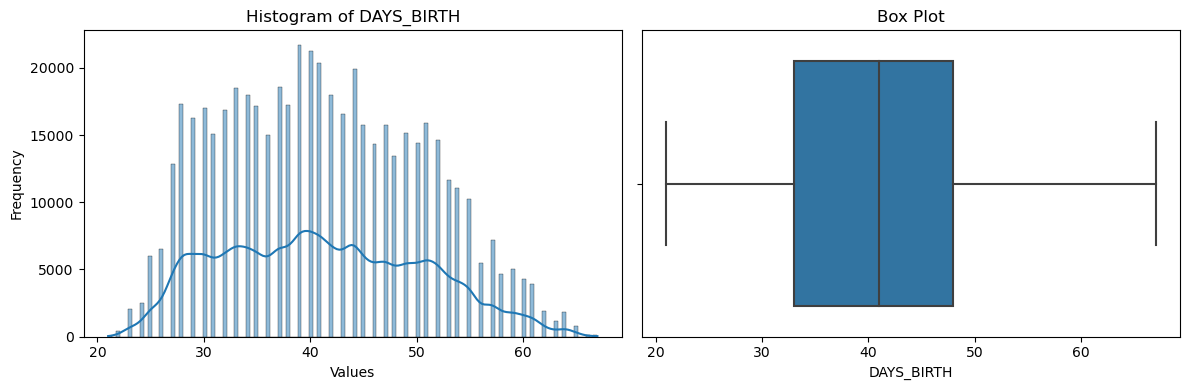

In [18]:
#DAYS_BIRTH col
df['DAYS_BIRTH'] = -(df['DAYS_BIRTH'] / 365).round()
print(df['DAYS_BIRTH'])

fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 


sns.histplot(df['DAYS_BIRTH'], kde=True, ax=axes[0])
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of DAYS_BIRTH')


sns.boxplot(data=df, x='DAYS_BIRTH', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Box Plot')

plt.tight_layout()

plt.savefig("age.png")
plt.show()


In [19]:
df['DAYS_BIRTH'].astype(str)

31        59.0
32        59.0
33        59.0
34        59.0
35        59.0
          ... 
777710    25.0
777711    25.0
777712    25.0
777713    25.0
777714    25.0
Name: DAYS_BIRTH, Length: 523989, dtype: object

In [20]:
df['DAYS_BIRTH'] = pd.cut(x=df['DAYS_BIRTH'], bins=5,labels = ['Lowest','Low','Medium','High','Highest'])
df['DAYS_BIRTH'].value_counts()

Low        158088
Medium     155283
High       105691
Lowest      81070
Highest     23857
Name: DAYS_BIRTH, dtype: int64

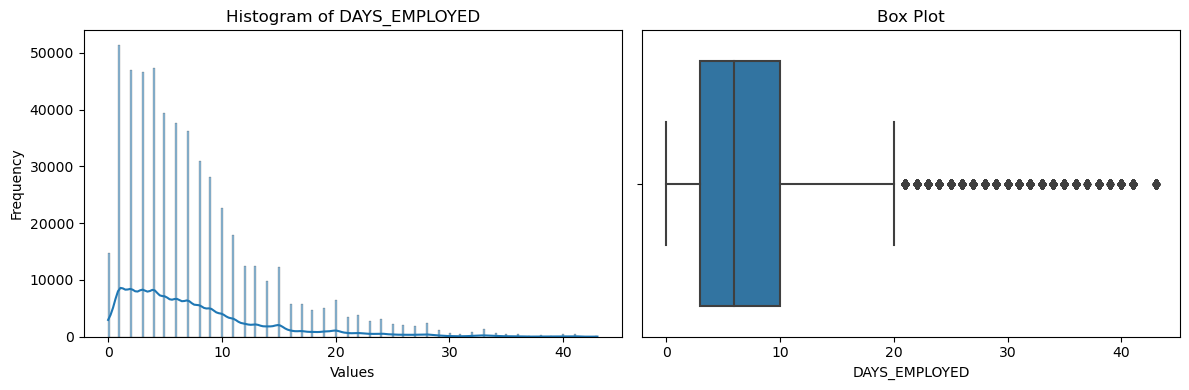

In [21]:
#DAYS_EMPLOYED col
df['DAYS_EMPLOYED']= (-df['DAYS_EMPLOYED']/365).round()
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 


sns.histplot(df['DAYS_EMPLOYED'], kde=True, ax=axes[0])
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of DAYS_EMPLOYED')


sns.boxplot(data=df, x='DAYS_EMPLOYED', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Box Plot')

plt.tight_layout()
plt.savefig("employ_year.png")

plt.show()

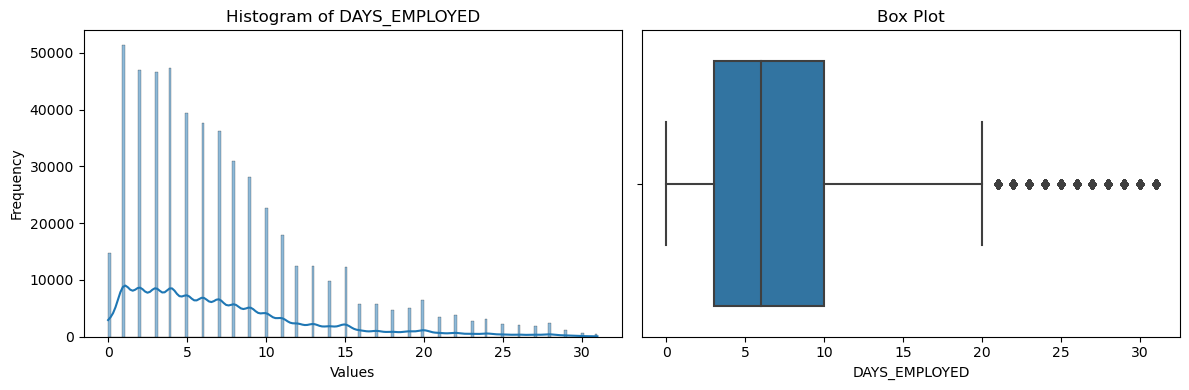

In [22]:
df = drop_outliers(df,'DAYS_EMPLOYED',3)

fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 


sns.histplot(df['DAYS_EMPLOYED'], kde=True, ax=axes[0])
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of DAYS_EMPLOYED')


sns.boxplot(data=df, x='DAYS_EMPLOYED', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Box Plot')

plt.tight_layout()


plt.show()

In [23]:
df['DAYS_EMPLOYED'].astype(str)

31        3.0
32        3.0
33        3.0
34        3.0
35        3.0
         ... 
777710    3.0
777711    3.0
777712    3.0
777713    3.0
777714    3.0
Name: DAYS_EMPLOYED, Length: 518669, dtype: object

In [24]:
df['DAYS_EMPLOYED'] = pd.cut(x=df['DAYS_EMPLOYED'], bins=[-1,7,14,40],labels = ['Low','Medium','High'])
df['DAYS_EMPLOYED'].value_counts()

Low       320434
Medium    134362
High       63873
Name: DAYS_EMPLOYED, dtype: int64

In [25]:
#CNT_FAM_MEMBERS
df['CNT_FAM_MEMBERS'].value_counts()

2.0    273310
3.0    108672
1.0     81751
4.0     54936
Name: CNT_FAM_MEMBERS, dtype: int64

CALCULATE IV FOR ALL CONTINOUS VARIABLE

In [26]:
table = pd.DataFrame()

In [27]:
iv, data=calc_iv(df,'CNT_CHILDREN','STATUS')
ivtable.loc[ivtable['variable']=='CNT_CHILDREN','iv']=iv
data.head()

This variable's IV is: 0.019166660101572787
0    334436
1    126063
2     58170
Name: CNT_CHILDREN, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,CNT_CHILDREN,0,334436,333249,1187,0.644797,0.003549,0.644844,0.631719,0.020564,0.000270
1,CNT_CHILDREN,1,126063,125521,542,0.243051,0.004299,0.242886,0.288451,-0.171935,0.007834
2,CNT_CHILDREN,2,58170,58020,150,0.112152,0.002579,0.112270,0.079830,0.341011,0.011062


In [28]:
iv, data=calc_iv(df,'AMT_INCOME_TOTAL','STATUS')
ivtable.loc[ivtable['variable']=='AMT_INCOME_TOTAL','iv']=iv
data.head()
data1 = data[['Variable','Value','WoE']]
data1 = pd.DataFrame(data1)

This variable's IV is: 0.025717188623737418
Low        276471
Lowest     120826
Medium      86613
High        32122
Highest      2637
Name: AMT_INCOME_TOTAL, dtype: int64


In [29]:
iv, data=calc_iv(df,'DAYS_BIRTH','STATUS')
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','iv']=iv
data.head()
data2 = data[['Variable','Value','WoE']]
data2 = pd.DataFrame(data2)

This variable's IV is: 0.17373315233837164
Low        158088
Medium     155283
High       103068
Lowest      81070
Highest     21160
Name: DAYS_BIRTH, dtype: int64


In [30]:
iv, data=calc_iv(df,'DAYS_EMPLOYED','STATUS')
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','iv']=iv
data.head()
data3 = data[['Variable','Value','WoE']]
data3 = pd.DataFrame(data3)

This variable's IV is: 0.07074243602317007
Low       320434
Medium    134362
High       63873
Name: DAYS_EMPLOYED, dtype: int64


In [31]:
iv, data=calc_iv(df,'CNT_FAM_MEMBERS','STATUS')
ivtable.loc[ivtable['variable']=='CNT_FAM_MEMBERS','iv']=iv
data.head()
data4 = data[['Variable','Value','WoE']]
data4 = pd.DataFrame(data4)

This variable's IV is: 0.0239024223683885
2.0    273310
3.0    108672
1.0     81751
4.0     54936
Name: CNT_FAM_MEMBERS, dtype: int64


In [32]:
print(ivtable)

               variable        iv
0           CODE_GENDER      None
1          FLAG_OWN_CAR      None
2       FLAG_OWN_REALTY      None
3          CNT_CHILDREN  0.019167
4      AMT_INCOME_TOTAL  0.025717
5      NAME_INCOME_TYPE      None
6   NAME_EDUCATION_TYPE      None
7    NAME_FAMILY_STATUS      None
8     NAME_HOUSING_TYPE      None
9            DAYS_BIRTH  0.173733
10        DAYS_EMPLOYED  0.070742
11      OCCUPATION_TYPE      None
12      CNT_FAM_MEMBERS  0.023902


BINARY VARIABLE


In [33]:
#Gender col
iv, data=calc_iv(df,'CODE_GENDER','STATUS')
ivtable.loc[ivtable['variable']=='CODE_GENDER','iv']=iv
data.head()
data5 = data[['Variable','Value','WoE']]
data5 = pd.DataFrame(data5)

This variable's IV is: 0.09145044930661249
F    321525
M    197144
Name: CODE_GENDER, dtype: int64


In [34]:
#OWN_car col
iv, data=calc_iv(df,'FLAG_OWN_CAR','STATUS')
ivtable.loc[ivtable['variable']=='FLAG_OWN_CAR','iv']=iv
data.head()

This variable's IV is: 0.008045797101452017
N    296605
Y    222064
Name: FLAG_OWN_CAR, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,FLAG_OWN_CAR,N,296605,295614,991,0.571858,0.003341,0.57202,0.527408,0.081198,0.003622
1,FLAG_OWN_CAR,Y,222064,221176,888,0.428142,0.003999,0.42798,0.472592,-0.099155,0.004423


In [35]:
#FLAG_OWN_REALTY col
iv, data=calc_iv(df,'FLAG_OWN_REALTY','STATUS')
ivtable.loc[ivtable['variable']=='FLAG_OWN_REALTY','iv']=iv
data.head()

This variable's IV is: 0.006244927670711482
Y    331753
N    186916
Name: FLAG_OWN_REALTY, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,FLAG_OWN_REALTY,N,186916,186309,607,0.360376,0.003247,0.360512,0.323044,0.109736,0.004112
1,FLAG_OWN_REALTY,Y,331753,330481,1272,0.639624,0.003834,0.639488,0.676956,-0.056938,0.002133


DISCREATE VARIABLE

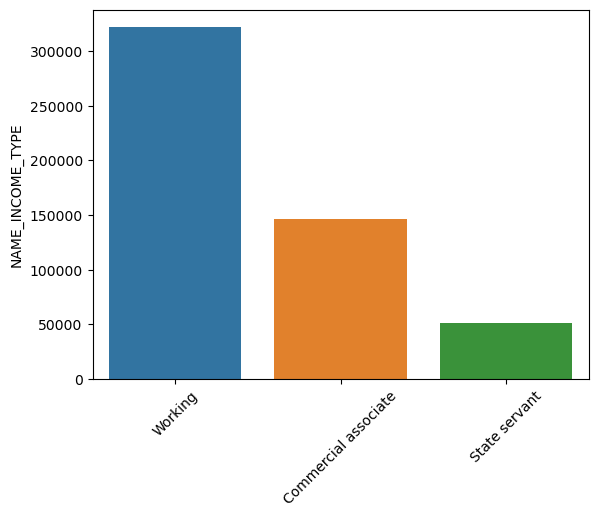

In [36]:
#NAME_INCOME_TYPE col
df['NAME_INCOME_TYPE'].value_counts()
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].replace({'Pensioner':'State servant','Student':'State servant'})

sns.barplot(x=df['NAME_INCOME_TYPE'].value_counts().index, y=df['NAME_INCOME_TYPE'].value_counts())
plt.xticks(rotation=45)
plt.savefig("income_type.png")
plt.show()

In [37]:
iv, data=calc_iv(df,'NAME_INCOME_TYPE','STATUS')
ivtable.loc[ivtable['variable']=='NAME_INCOME_TYPE','iv']=iv
data.head()
data6 = data[['Variable','Value','WoE']]
data6 = pd.DataFrame(data6)

This variable's IV is: 0.026817266807996336
Working                 321672
Commercial associate    145948
State servant            51049
Name: NAME_INCOME_TYPE, dtype: int64


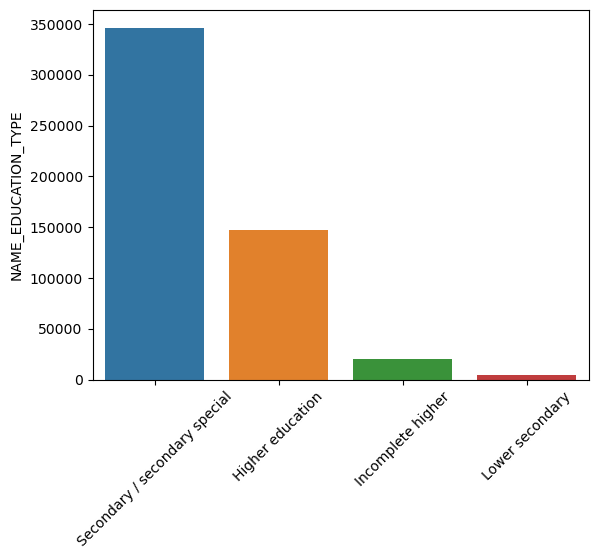

In [38]:
#NAME_EDUCATION_TYPE col
df['NAME_EDUCATION_TYPE'].value_counts()
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].replace({'Academic degree':'Higher education','Lower secondary ':'Incomplete higher'})

sns.barplot(x=df['NAME_EDUCATION_TYPE'].value_counts().index, y=df['NAME_EDUCATION_TYPE'].value_counts())
plt.xticks(rotation=45)
plt.savefig("edu.png")
plt.show()

In [39]:
iv, data=calc_iv(df,'NAME_EDUCATION_TYPE','STATUS')
ivtable.loc[ivtable['variable']=='NAME_EDUCATION_TYPE','iv']=iv
data.head()
data7 = data[['Variable','Value','WoE']]
data7 = pd.DataFrame(data7)

This variable's IV is: 0.030420492977225492
Secondary / secondary special    346598
Higher education                 147683
Incomplete higher                 19834
Lower secondary                    4554
Name: NAME_EDUCATION_TYPE, dtype: int64


Married                 369234
Single / not married     64337
Civil marriage           43728
Separated                29777
Widow                    11593
Name: NAME_FAMILY_STATUS, dtype: int64


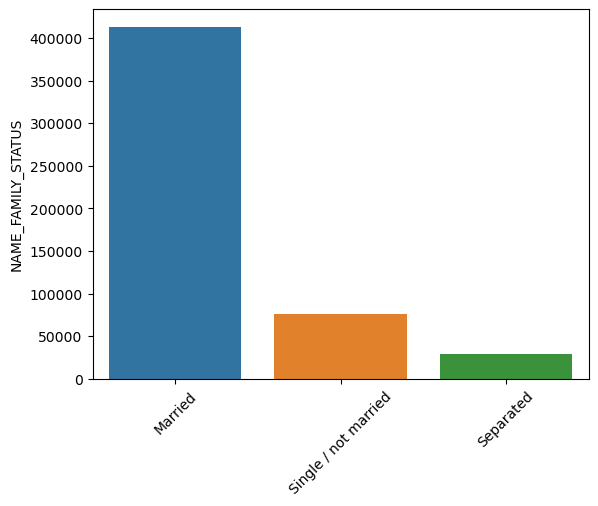

In [40]:
#NAME_FAMILY_STATUS col
print(df['NAME_FAMILY_STATUS'].value_counts())
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace({'Widow':'Single / not married','Civil marriage':'Married'})

sns.barplot(x=df['NAME_FAMILY_STATUS'].value_counts().index, y=df['NAME_FAMILY_STATUS'].value_counts())
plt.xticks(rotation=45)
plt.savefig("famsstat.png")
plt.show()

In [41]:
iv, data=calc_iv(df,'NAME_FAMILY_STATUS','STATUS')
ivtable.loc[ivtable['variable']=='NAME_FAMILY_STATUS','iv']=iv
data.head()
data8 = data[['Variable','Value','WoE']]
data8 = pd.DataFrame(data8)

This variable's IV is: 0.038839512730015874
Married                 412962
Single / not married     75930
Separated                29777
Name: NAME_FAMILY_STATUS, dtype: int64


House / apartment      456753
With parents            28825
Municipal apartment     17605
Rented apartment         8510
Office apartment         3893
Co-op apartment          3083
Name: NAME_HOUSING_TYPE, dtype: int64


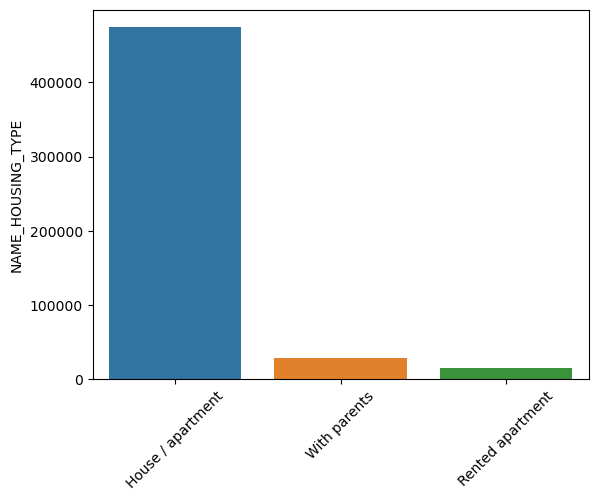

In [42]:
#NAME_HOUSING_TYPE col
print(df['NAME_HOUSING_TYPE'].value_counts())
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].replace({'Co-op apartment':'Rented apartment','Municipal apartment':'House / apartment',
                                                          'Office apartment':'Rented apartment'})
sns.barplot(x=df['NAME_HOUSING_TYPE'].value_counts().index, y=df['NAME_HOUSING_TYPE'].value_counts())
plt.xticks(rotation=45)
plt.savefig("house.png")
plt.show()

In [43]:
iv, data=calc_iv(df,'NAME_HOUSING_TYPE','STATUS')
ivtable.loc[ivtable['variable']=='NAME_HOUSING_TYPE','iv']=iv
data.head()

This variable's IV is: 0.007507370013819008
House / apartment    474358
With parents          28825
Rented apartment      15486
Name: NAME_HOUSING_TYPE, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,NAME_HOUSING_TYPE,House / apartment,474358,472655,1703,0.914568,0.003590,0.914598,0.906333,0.009077,0.000075
1,NAME_HOUSING_TYPE,Rented apartment,15486,15401,85,0.029857,0.005489,0.029801,0.045237,-0.417360,0.006442
2,NAME_HOUSING_TYPE,With parents,28825,28734,91,0.055575,0.003157,0.055601,0.048430,0.138080,0.000990


In [44]:
#OCCUPATION_TYPE
df['OCCUPATION_TYPE'].value_counts()

replace_dict_ocu = {'Core staff':'Office','Sales staff':'Office','Managers':'Office','Medicine staff':'Office',
                   'Accountants':'Office','Secretaries':'Office','HR staff':'Office','Realty agents':'Office',
                   'Drivers':'Laborers','Cooking staff':'Laborers','Security staff':'Laborers','Cleaning staff':'Laborers',
                   'Low-skill Laborers':'Laborers','Waiters/barmen staff':'Laborers','Private service staff':'Laborers',
                   'High skill tech staff':'IT','IT staff':'IT'}

df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace(replace_dict_ocu)

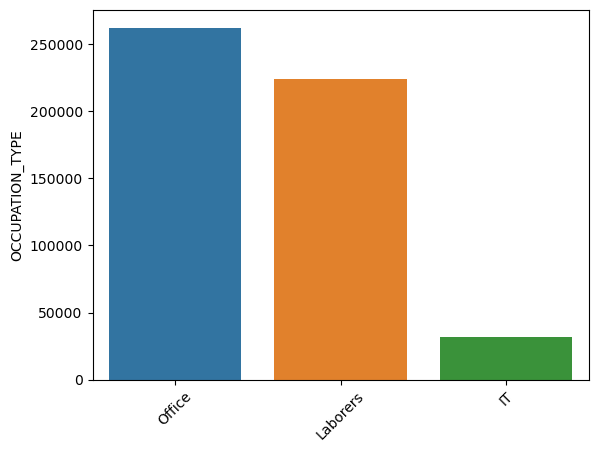

In [45]:
sns.barplot(x=df['OCCUPATION_TYPE'].value_counts().index, y=df['OCCUPATION_TYPE'].value_counts())
plt.xticks(rotation=45)
plt.savefig("job.png")
plt.show()

In [46]:
iv, data=calc_iv(df,'OCCUPATION_TYPE','STATUS')
ivtable.loc[ivtable['variable']=='OCCUPATION_TYPE','iv']=iv
data.head()
data9 = data[['Variable','Value','WoE']]
data9 = pd.DataFrame(data9)

This variable's IV is: 0.04001131514047351
Office      262652
Laborers    224375
IT           31642
Name: OCCUPATION_TYPE, dtype: int64


In [47]:
print(ivtable)

               variable        iv
0           CODE_GENDER   0.09145
1          FLAG_OWN_CAR  0.008046
2       FLAG_OWN_REALTY  0.006245
3          CNT_CHILDREN  0.019167
4      AMT_INCOME_TOTAL  0.025717
5      NAME_INCOME_TYPE  0.026817
6   NAME_EDUCATION_TYPE   0.03042
7    NAME_FAMILY_STATUS   0.03884
8     NAME_HOUSING_TYPE  0.007507
9            DAYS_BIRTH  0.173733
10        DAYS_EMPLOYED  0.070742
11      OCCUPATION_TYPE  0.040011
12      CNT_FAM_MEMBERS  0.023902


In [48]:
new_df = df[['CODE_GENDER','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','DAYS_BIRTH',
            'DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','STATUS']]
new_df = new_df.rename(columns={'CODE_GENDER': 'Gender', 'CNT_CHILDREN': 'Children','NAME_INCOME_TYPE': 'Income',
                               'NAME_FAMILY_STATUS': 'Family status','NAME_EDUCATION_TYPE': 'Education','DAYS_BIRTH': 'Age',
                               'DAYS_EMPLOYED': 'Employed year','OCCUPATION_TYPE': 'Job','CNT_FAM_MEMBERS': 'Family members',
                               'STATUS': 'Default'})

print(new_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 518669 entries, 31 to 777714
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Gender          518669 non-null  object  
 1   Children        518669 non-null  int64   
 2   Income          518669 non-null  object  
 3   Education       518669 non-null  object  
 4   Family status   518669 non-null  object  
 5   Age             518669 non-null  category
 6   Employed year   518669 non-null  category
 7   Job             518669 non-null  object  
 8   Family members  518669 non-null  float64 
 9   Default         518669 non-null  int64   
dtypes: category(2), float64(1), int64(2), object(5)
memory usage: 36.6+ MB
None


In [49]:
a = pd.get_dummies(new_df[['Gender','Income','Education','Family status','Age','Employed year','Job','Default']])
a = pd.concat([a,new_df[['Children','Family members']]],axis = 1)

In [50]:
X = a.drop('Default',axis = 1)
Y = a['Default']

In [51]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)
X_res = pd.DataFrame(X_res, columns = X.columns)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=321)

In [53]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [54]:
logit = LogisticRegression(class_weight='balanced')
logit.fit(X_train, y_train)
y_pred_logit = logit.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred_logit)))
print(classification_report(y_test, y_pred_logit))

Accuracy Score is 0.68736
              precision    recall  f1-score   support

           0       0.69      0.69      0.69    155080
           1       0.69      0.69      0.69    154994

    accuracy                           0.69    310074
   macro avg       0.69      0.69      0.69    310074
weighted avg       0.69      0.69      0.69    310074



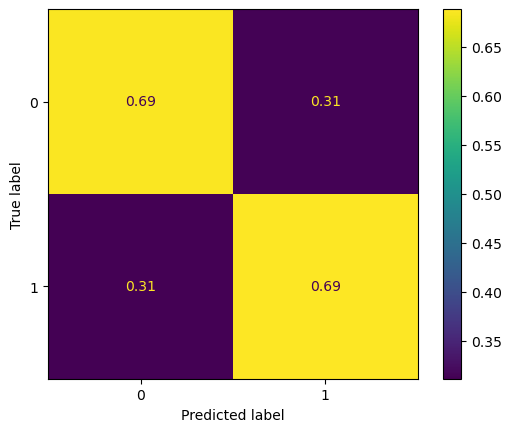

In [55]:
cm = confusion_matrix(y_test,y_pred_logit,normalize = 'true')
a = ConfusionMatrixDisplay(cm)
a.plot()
plt.savefig("logit.png")
plt.show()

In [56]:
tree = make_pipeline(
DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024))
                      
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred_tree)))
print(classification_report(y_test, y_pred_tree))

Accuracy Score is 0.8337
              precision    recall  f1-score   support

           0       0.89      0.77      0.82    155080
           1       0.79      0.90      0.84    154994

    accuracy                           0.83    310074
   macro avg       0.84      0.83      0.83    310074
weighted avg       0.84      0.83      0.83    310074



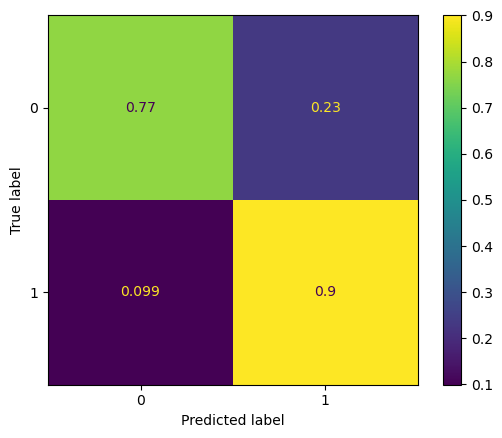

In [57]:
cm = confusion_matrix(y_test,y_pred_tree,normalize = 'true')
a = ConfusionMatrixDisplay(cm)
a.plot()
plt.show()

In [58]:
rf = make_pipeline(
RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              ))
                      
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred_rf)))
print(classification_report(y_test, y_pred_rf))

Accuracy Score is 0.87352
              precision    recall  f1-score   support

           0       0.91      0.83      0.87    155080
           1       0.85      0.91      0.88    154994

    accuracy                           0.87    310074
   macro avg       0.88      0.87      0.87    310074
weighted avg       0.88      0.87      0.87    310074



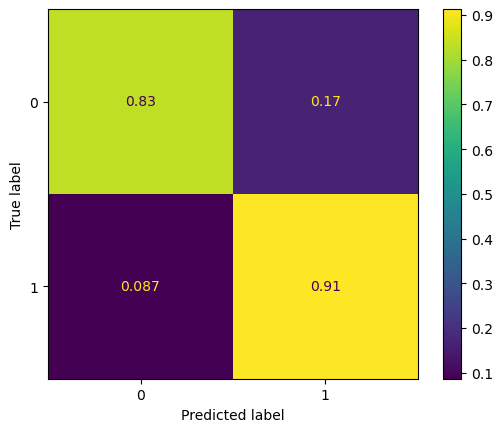

In [59]:
cm = confusion_matrix(y_test,y_pred_rf,normalize = 'true')
a = ConfusionMatrixDisplay(cm)
a.plot()
plt.show()

In [60]:
auc_tree = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])
print(auc_tree)

0.9193981760346309


In [61]:
auc_logit = roc_auc_score(y_test, logit.predict_proba(X_test)[:, 1])
print(auc_logit)

0.7198211608033193


In [62]:
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(auc_rf)

0.9468972124655018


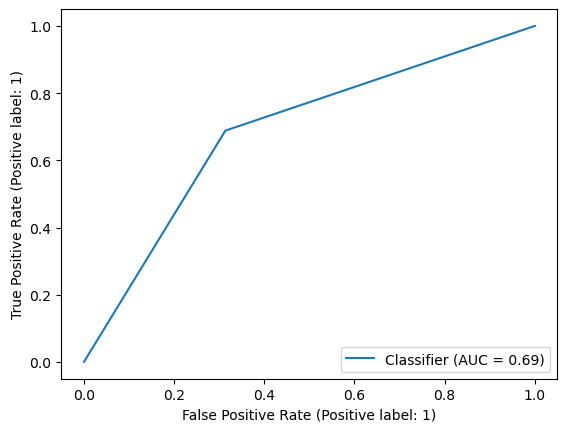

In [63]:
display = RocCurveDisplay.from_predictions(y_test,y_pred_logit)

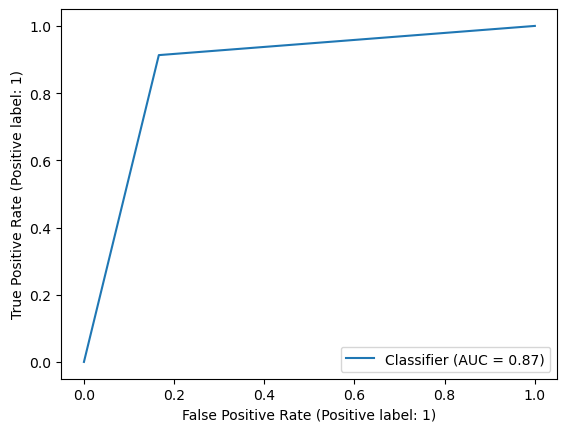

In [64]:
display = RocCurveDisplay.from_predictions(y_test,y_pred_rf)

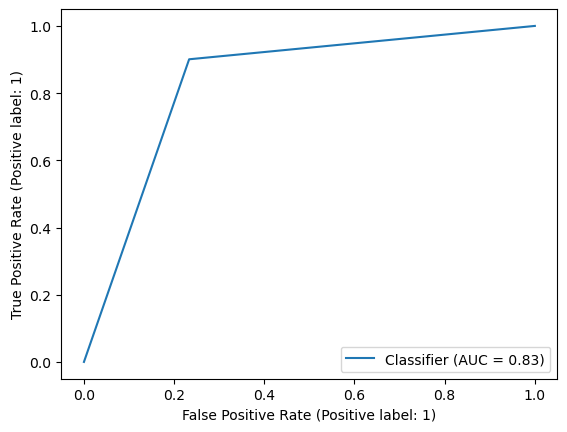

In [65]:
display = RocCurveDisplay.from_predictions(y_test,y_pred_tree)

In [66]:
gini_logit = 2*auc_logit -1 
gini_tree = 2*auc_tree -1
gini_rf = 2*auc_rf -1


In [67]:
def _CreditScore(beta, alpha, woe, n = 8, odds = 1/2, pdo = 20, thres_score = 600):
    factor = pdo/np.log(2)
    offset = thres_score - factor*np.log(odds)
    score = (beta*woe+alpha/n)*factor+offset/n
    return score


In [68]:
betas_dict = dict(zip(list(X_train.columns),logit.coef_[0]))
alpha = logit.intercept_[0]
betas_dict

{'Gender_F': -6.067364899115933,
 'Gender_M': -5.445404211381416,
 'Income_Commercial associate': -6.326468487531164,
 'Income_State servant': -6.618931232357069,
 'Income_Working': -6.528974522562352,
 'Education_Higher education': -4.333508029615405,
 'Education_Incomplete higher': -4.318095868574392,
 'Education_Lower secondary': -3.587357827156982,
 'Education_Secondary / secondary special': -4.66898906108528,
 'Family status_Married': -9.007415262985841,
 'Family status_Separated': -7.672178269390071,
 'Family status_Single / not married': -7.431204463105776,
 'Age_Lowest': -11.147095850164991,
 'Age_Low': -11.578706238144708,
 'Age_Medium': -11.010703794833127,
 'Age_High': -10.349147058210836,
 'Age_Highest': -12.644124167383852,
 'Employed year_Low': -7.215590505880997,
 'Employed year_Medium': -7.713207295578859,
 'Employed year_High': -7.866163112264811,
 'Job_IT': -3.1247312287550035,
 'Job_Laborers': -3.592256137902932,
 'Job_Office': -3.820891815062134,
 'Children': -1.141

In [69]:
woe_frame = [data2,data4,data5,data6,data7,data8,data9]
woe_df = pd.concat(woe_frame,join = 'inner')

In [70]:
woe_df['beta'] = []
print(woe_df)

ValueError: Length of values (0) does not match length of index (24)

In [ ]:
col = []
value =[]
woe = []
scores = []
for Value in woe_df:
    col.append(woe_df['Variable'])
    value.append(woe_df['Value'])
    woe.append(woe_df['WoE'])
    beta = betas_dict
    score = _CreditScore(beta = beta, alpha = alpha, woe = woe, n = 8)
    scores.append(score)

In [ ]:
[]

In [ ]:
()

In [ ]:
{}